In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
import seaborn as sns

In [7]:
pip install wordcloud

     -------------------------------------- 300.4/300.4 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\climate_headlines_sentiment.csv")

In [10]:
df.head()

,Unnamed: 0,Headline,Link,Content,Sentiment,Justification
0,0,Australia's year ahead in climate and environm...,https://www.abc.net.au/news/science/2024-01-23...,The year has barely started and extreme weath...,0.0,The headline is unclear about its direct impac...
1,1,Projections reveal the vulnerability of freshw...,https://news.griffith.edu.au/2024/01/09/projec...,"“Water from groundwater, rivers and rainfall ...",-0.5,The vulnerability of freshwater is concerning ...
2,2,"Record heat in 2023 worsened global droughts, ...",https://www.anu.edu.au/news/all-news/record-he...,2023 saw an increase in the frequency and int...,-1.0,The headline describes worsening environmental...
3,3,"It's not just the total rainfall ""“ why is eas...",https://www.theguardian.com/australia-news/202...,The number of storms in some regions is decre...,0.0,The headline is unclear about its stance on cl...
4,4,Expert Commentary: 2023 was the warmest year o...,https://www.csiro.au/en/news/all/news/2024/jan...,The European Union's Copernicus Climate Chang...,-0.5,While highlighting the reality of climate chan...


In [11]:
df.columns

Index(['Unnamed: 0', 'Headline', 'Link', 'Content', 'Sentiment',
       'Justification'],
      dtype='object')

## Data Cleaning and Preprocessing

In [12]:
#Drop the column 'Unnamed: 0' as it is just an index
df.drop(columns=['Unnamed: 0'], inplace=True)

In [13]:
df.columns

Index(['Headline', 'Link', 'Content', 'Sentiment', 'Justification'], dtype='object')

In [14]:
#Checking for Missing Values
df.isnull().sum()

Headline         0
Link             0
Content          0
Sentiment        1
Justification    1
dtype: int64

In [16]:
#Drop rows with missing Sentiment values
df.dropna(subset=['Sentiment'], inplace=True )

In [17]:
#Verify missing values are handled
df.isnull().sum()

Headline         0
Link             0
Content          0
Sentiment        0
Justification    0
dtype: int64

# Exploratory Data Analysis

## Sentiment Distribution

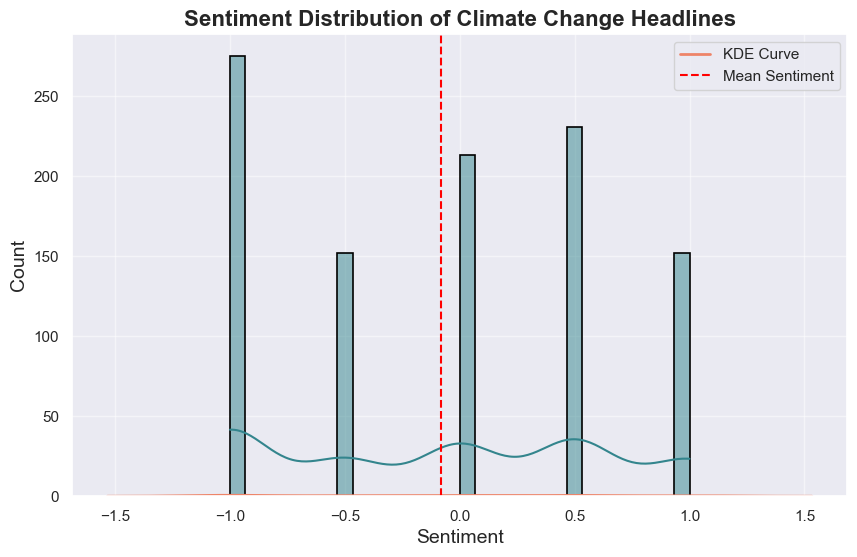

In [40]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))

sns.histplot(df['Sentiment'], bins=30,kde=True, edgecolor='black', linewidth=1.2, color=sns.color_palette("crest",as_cmap=True)(0.5))

plt.title('Sentiment Distribution of Climate Change Headlines', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=14)
plt.ylabel('Count', fontsize=14)

sns.kdeplot(df['Sentiment'], color=sns.color_palette("coolwarm", as_cmap=True)(0.8), linewidth=2, label='KDE Curve')

plt.grid(visible=True, alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.axvline(df['Sentiment'].mean(), color='red', linestyle='--', label='Mean Sentiment')
plt.legend()

plt.show()

## Identifying Sentiment Patterns

Sentiment Category Distribution: 
 Negative    427
Positive    383
Neutral     213
Name: Sentiment_Category, dtype: int64


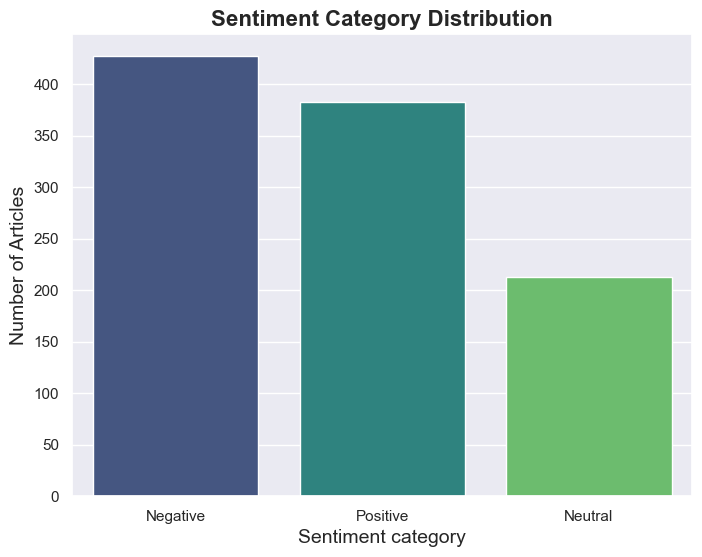

In [77]:
def sentiment_category(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    else:
        return 'Neutral'


#Apply Categorization
df['Sentiment_Category'] = df['Sentiment'].apply(sentiment_category)

#Count the number of articles in each sentiment category
sentiment_counts = df['Sentiment_Category'].value_counts()

#Display Results
print("Sentiment Category Distribution: \n", sentiment_counts)

#Plot the sentiment category distribution
plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Sentiment Category Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Sentiment category", fontsize=14)
plt.ylabel("Number of Articles", fontsize=14)

plt.show()

## Headline Analysis

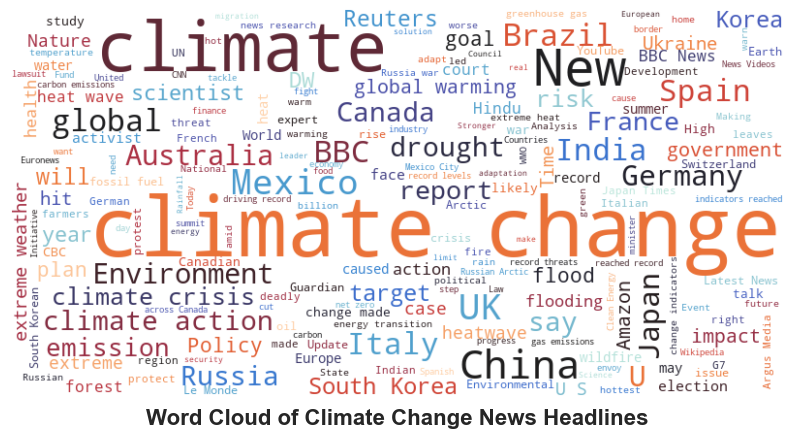

In [68]:
#Generating a WordCloud for the Headlines
text = " ".join(df['Headline'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap="icefire").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title("Word Cloud of Climate Change News Headlines", fontsize=16, fontweight='bold')
plt.text(0.5,-0.07, "Word Cloud of Climate Change News Headlines", horizontalalignment='center', transform=plt.gca().transAxes,fontsize=16, fontweight='bold')
plt.show()

## Sentiment Trends by Themes based on Headline keywords

Average Sentiment Score by Theme:  Theme
Climate Change   -0.07
Others           -0.12
Policy            0.20
Name: Sentiment, dtype: float64


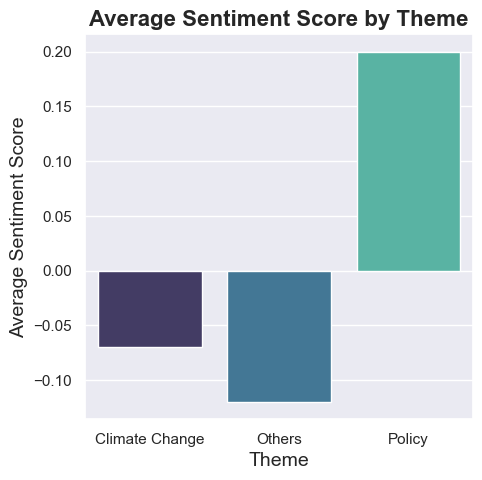

In [75]:
#Define themes based in keywords in headlines
def identify_theme(headline):
    if any(word in headline.lower() for word in ['climate', 'warming', 'environment']):
        return 'Climate Change'
    elif any(word in headline.lower() for word in ['policy', 'government', 'regulation']):
        return 'Policy'
    else:
        return 'Others'

#Apply the theme categorization
df['Theme'] = df['Headline'].apply(identify_theme)

#Group by theme and calculate average sentiment
theme_sentiment = df.groupby('Theme')['Sentiment'].mean().round(2)

#Display the results
print("Average Sentiment Score by Theme: ",theme_sentiment)

#Plot the results
plt.figure(figsize=(5,5))
sns.barplot(x=theme_sentiment.index, y=theme_sentiment.values, palette="mako")
plt.title("Average Sentiment Score by Theme", fontsize=16, fontweight='bold')
plt.xlabel("Theme", fontsize=14)
plt.ylabel("Average Sentiment Score", fontsize=14)

plt.show()

In [86]:
import re

In [87]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error

In [106]:
df['Cleaned Headline'] = df['Headline'].apply(preprocess_text)

In [107]:
headlines = df['Cleaned Headline']
sentiments = df['Sentiment']

In [108]:
headlines_train, headlines_test, sentiments_train, sentiments_test = train_test_split(headlines, sentiments, test_size=0.2,random_state=42)

In [109]:
vectorizer = TfidfVectorizer(max_features = 5000)
headlines_train_tfidf = vectorizer.fit_transform(headlines_train)
headlines_test_tfidf = vectorizer.transform(headlines_test)

In [110]:
#Create individual regressors
reg1 = LinearRegression()
reg2 = KNeighborsRegressor(n_neighbors=5)
reg3 = DecisionTreeRegressor(random_state=1)

In [111]:
#Create a VotingRegressor with Hard averaging(default)
voting_regressor = VotingRegressor(estimators = [('lr', reg1), ('knn', reg2), ('dt', reg3)])


In [112]:
#Train the Voting regressor
voting_regressor.fit(headlines_train_tfidf, sentiments_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('knn', KNeighborsRegressor()),
                            ('dt', DecisionTreeRegressor(random_state=1))])

In [113]:
sentiments_pred = voting_regressor.predict(headlines_test_tfidf)

In [116]:
mse = mean_squared_error(sentiments_test, sentiments_pred)
print(f"Mean Squared Error: {mse}") 

Mean Squared Error: 0.4564772055519569
